In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##Đọc và xử lí dữ liệu

In [ ]:
# Đường dẫn tới file CSV
air_passengers = '~/air_passengers.csv' #Enter your data here

In [ ]:
# Đọc dữ liệu
air_passengers_data = pd.read_csv(air_passengers)
print(air_passengers_data.head())

   air_passengers
0             112
1             104
2             158
3             199
4             183


In [ ]:
# Lấy cột giá trị
values = air_passengers_data.iloc[:, 0]
y = values.values.reshape(-1, 1)
N = len(y)
print("Data size:", N)

Data size: 144


In [ ]:
# Tạo chỉ số tuần làm đặc trưng (biến độc lập)
X = np.arange(N).reshape(-1, 1)

# Thêm cột bias (1) vào X
X_bias = np.hstack([np.ones((N, 1)), X])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_bias, y, test_size=0.2, random_state=42)
print("Train size:", X_train.shape[0], "| Test size:", X_test.shape[0])


Train size: 115 | Test size: 29


##Trực quan dữ liệu

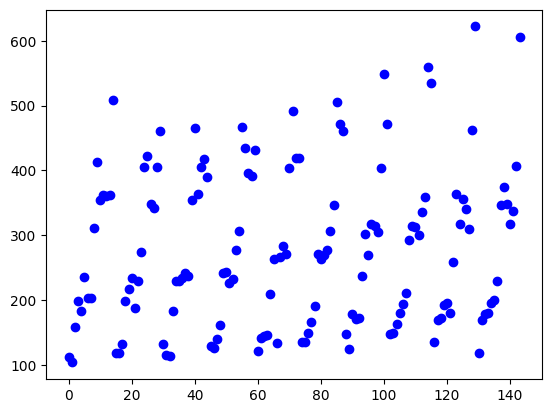

In [ ]:
#Trực quan phân bố dữ liệu
plt.plot( values, 'bo ')
plt.show()

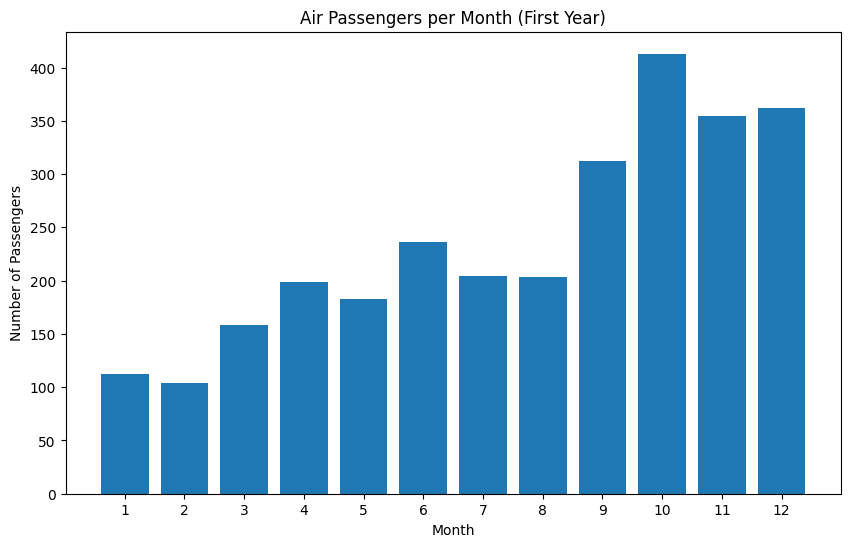

In [ ]:
months = range(1, 13) # Assuming each value corresponds to a month
plt.figure(figsize=(10, 6))
plt.bar(months, values[:12]) # Plotting the first 12 values as an example
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.title("Air Passengers per Month (First Year)")
plt.xticks(months)
plt.show()

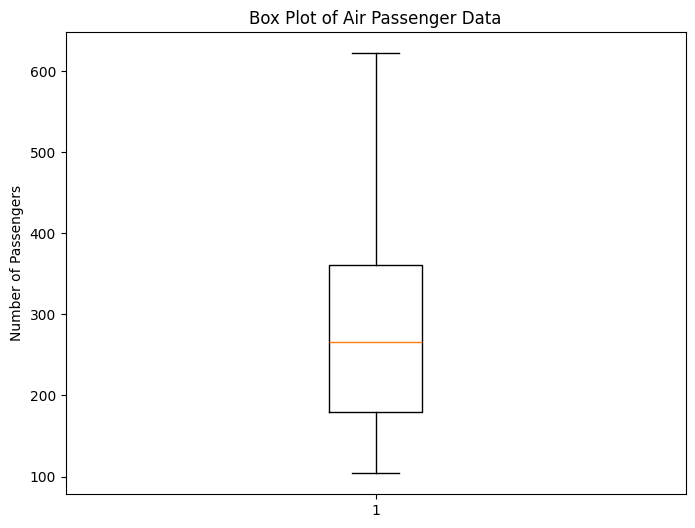

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.boxplot(values)
plt.ylabel("Number of Passengers")
plt.title("Box Plot of Air Passenger Data")
plt.show()

##Xây dựng Linear Regression từ đầu

In [ ]:
# 1. Hàm dự đoán
def predict(x, theta):
    return x @ theta

# 2. Hàm tính đạo hàm (gradient)
def compute_gradient(y_hat, y_true, x):
    return 2 * x.T @ (y_hat - y_true) / x.shape[0]

# 3. Cập nhật tham số
def update_theta(theta, gradient, lr):
    return theta - lr * gradient

# 4. Hàm tính lỗi MSE
def compute_loss(y_hat, y_true):
    return np.mean((y_hat - y_true) ** 2)


###Huấn luyện

In [ ]:
# Huấn luyện bằng Gradient Descent trên tập train
epoch_max = 100000
lr = 0.0001
theta = np.zeros((X_train.shape[1], 1))  # [w0, w1]
losses = []

for epoch in range(epoch_max):
    y_hat = predict(X_train, theta)
    loss = compute_loss(y_hat, y_train)
    gradient = compute_gradient(y_hat, y_train, X_train)
    theta = update_theta(theta, gradient, lr)
    losses.append(loss)

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss:.4f}, theta = {theta.ravel()}")


Epoch 100: Loss = 28401.4700, theta = [1.20834424 3.00380401]
Epoch 200: Loss = 28264.2639, theta = [2.37958637 2.99168157]
Epoch 300: Loss = 28128.4266, theta = [3.54497149 2.97961976]
Epoch 400: Loss = 27993.9445, theta = [4.70452888 2.96761826]
Epoch 500: Loss = 27860.8040, theta = [5.8582877  2.95567678]
Epoch 600: Loss = 27728.9918, theta = [7.00627693 2.94379501]
Epoch 700: Loss = 27598.4946, theta = [8.14852544 2.93197266]
Epoch 800: Loss = 27469.2992, theta = [9.28506192 2.92020943]
Epoch 900: Loss = 27341.3928, theta = [10.41591495  2.90850503]
Epoch 1000: Loss = 27214.7624, theta = [11.54111294  2.89685915]
Epoch 1100: Loss = 27089.3953, theta = [12.66068417  2.88527151]
Epoch 1200: Loss = 26965.2789, theta = [13.77465678  2.87374182]
Epoch 1300: Loss = 26842.4007, theta = [14.88305877  2.86226979]
Epoch 1400: Loss = 26720.7485, theta = [15.985918    2.85085512]
Epoch 1500: Loss = 26600.3098, theta = [17.08326217  2.83949753]
Epoch 1600: Loss = 26481.0727, theta = [18.1751188

###Kết quả

In [ ]:
# Dự đoán trên tập test
pred1 = predict(X_test, theta)
# Các độ đo
MSE_1 = mean_squared_error(y_test, pred1)
RMSE_1 = np.sqrt(MSE_1)
R2_1 = r2_score(y_test, pred1)

print("Mean Squared Error (MSE) of the 1st model:\n", MSE_1)
print("Root Mean Squared Error (RMSE) of the 1st model:\n", RMSE_1)
print("R Square of the 1st model:\n", R2_1)

Mean Squared Error (MSE) of the 1st model:
 12368.716340305045
Root Mean Squared Error (RMSE) of the 1st model:
 111.21473077027632
R Square of the 1st model:
 -0.11353486999486861


In [ ]:
#In kết quả
print(f"Phương trình hồi quy: y = {theta[0][0]:.2f} + {theta[1][0]:.2f} * x")

Phương trình hồi quy: y = 233.86 + 0.60 * x


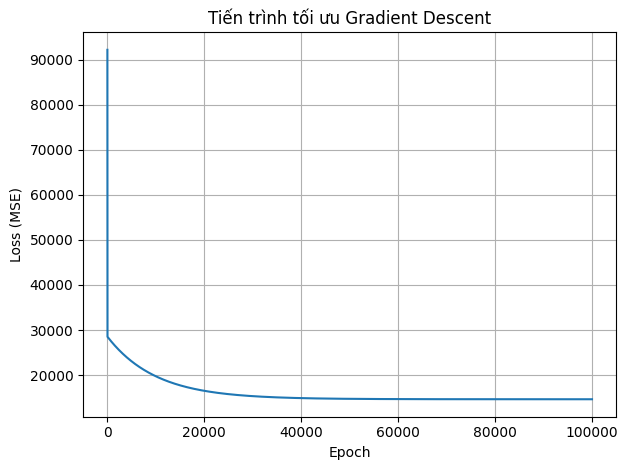

In [ ]:
# Biểu đồ Loss theo epoch
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Tiến trình tối ưu Gradient Descent')
plt.grid(True)
plt.tight_layout()
plt.show()

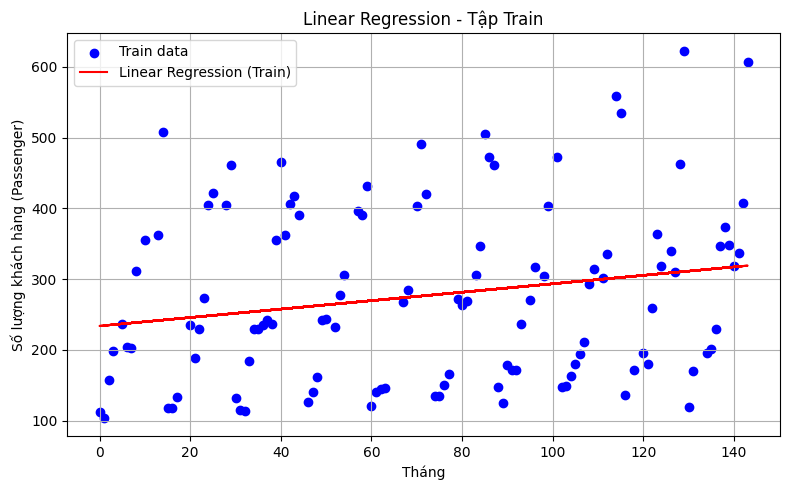

In [ ]:
# Dự đoán trên tập train để vẽ đường hồi quy cho tập train
y_train_pred = predict(X_train, theta)

plt.figure(figsize=(8, 5))
plt.scatter(X_train[:, 1], y_train, color='blue', label='Train data')
plt.plot(X_train[:, 1], y_train_pred, color='red', label='Linear Regression (Train)')
plt.xlabel('Tháng')
plt.ylabel('Số lượng khách hàng (Passenger)')
plt.title('Linear Regression - Tập Train')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


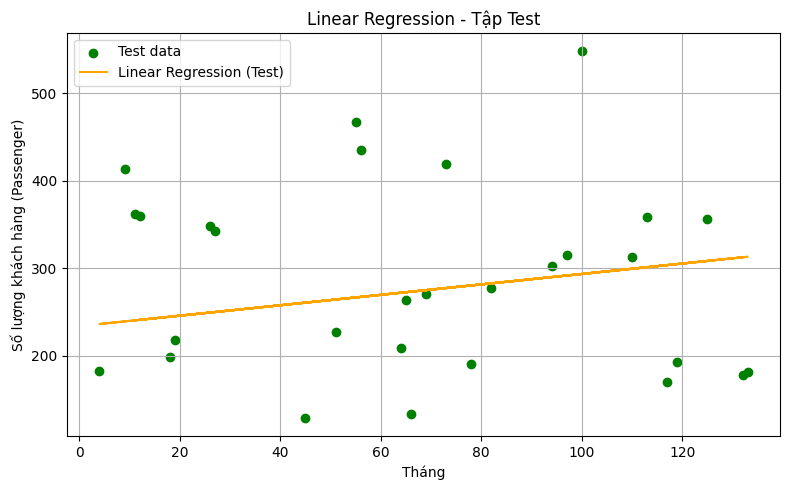

In [ ]:
# Dự đoán trên tập test để vẽ đường hồi quy trên test
y_test_pred = predict(X_test, theta)

plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 1], y_test, color='green', label='Test data')
plt.plot(X_test[:, 1], y_test_pred, color='orange', label='Linear Regression (Test)')
plt.xlabel('Tháng')
plt.ylabel('Số lượng khách hàng (Passenger)')
plt.title('Linear Regression - Tập Test')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


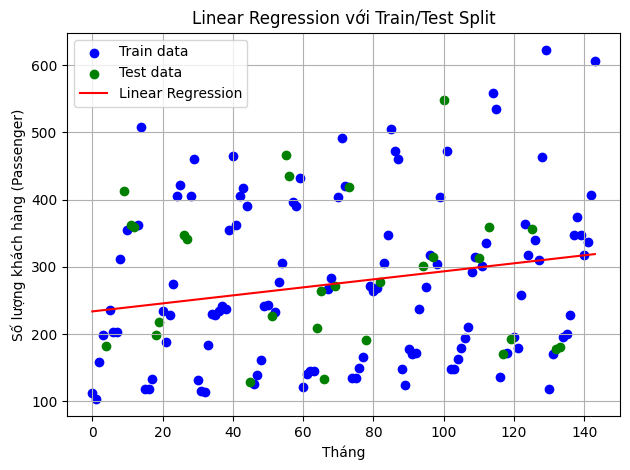

In [ ]:
# Dự đoán toàn bộ để hiển thị đường hồi quy
y_pred_full = predict(X_bias, theta)

# Biểu đồ dữ liệu và đường hồi quy
plt.scatter(X_train[:, 1], y_train, color='blue', label='Train data')
plt.scatter(X_test[:, 1], y_test, color='green', label='Test data')
plt.plot(X[:, 0], y_pred_full, color='red', label='Linear Regression')
plt.xlabel('Tháng')
plt.ylabel('Số lượng khách hàng (Passenger)')
plt.title('Linear Regression với Train/Test Split')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Xây dựng LR từ thư viện

In [ ]:
model2 = LinearRegression()

model2.fit(X_train[:, 1].reshape(-1, 1), y_train)

# Dự đoán trên tập test bằng mô hình từ thư viện
y_pred_lib = model2.predict(X_test[:, 1].reshape(-1, 1))

# Tính toán các độ đo cho mô hình từ thư viện
MSE_2 = mean_squared_error(y_test, y_pred_lib)
RMSE_2 = np.sqrt(MSE_2)
R2_2 = r2_score(y_test, y_pred_lib)

print("\nMean Squared Error (MSE) of the 2nd model (Library):", MSE_2)
print("Root Mean Squared Error (RMSE) of the 2nd model (Library):", RMSE_2)
print("R Square of the 2nd model (Library):", R2_2)

# So sánh kết quả với mô hình tự xây dựng
print("\nComparison:")
print(f"MSE (Manual): {MSE_1:.4f} | MSE (Library): {MSE_2:.4f}")
print(f"RMSE (Manual): {RMSE_1:.4f} | RMSE (Library): {RMSE_2:.4f}")
print(f"R2 (Manual): {R2_1:.4f} | R2 (Library): {R2_2:.4f}")


Mean Squared Error (MSE) of the 2nd model (Library): 12311.834950692697
Root Mean Squared Error (RMSE) of the 2nd model (Library): 110.95870831391602
R Square of the 2nd model (Library): -0.10841393350926776

Comparison:
MSE (Manual): 12368.7163 | MSE (Library): 12311.8350
RMSE (Manual): 111.2147 | RMSE (Library): 110.9587
R2 (Manual): -0.1135 | R2 (Library): -0.1084


In [ ]:
# In các hệ số của mô hình từ thư viện
print(f"Phương trình hồi quy (Library): y = {model2.intercept_[0]:.2f} + {model2.coef_[0][0]:.2f} * x")


Phương trình hồi quy (Library): y = 235.42 + 0.58 * x


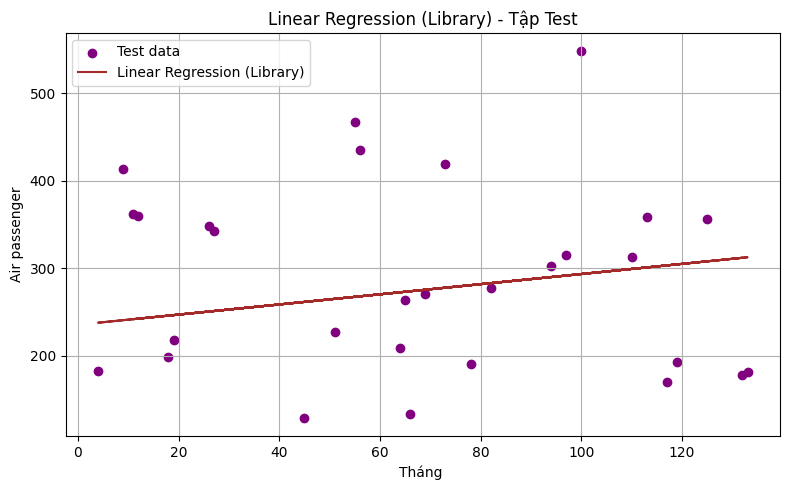

In [ ]:
# Biểu đồ kết quả của mô hình từ thư viện trên tập test
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 1], y_test, color='purple', label='Test data')
plt.plot(X_test[:, 1], y_pred_lib, color='brown', label='Linear Regression (Library)')
plt.xlabel('Tháng ')
plt.ylabel('Air passenger')
plt.title('Linear Regression (Library) - Tập Test')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

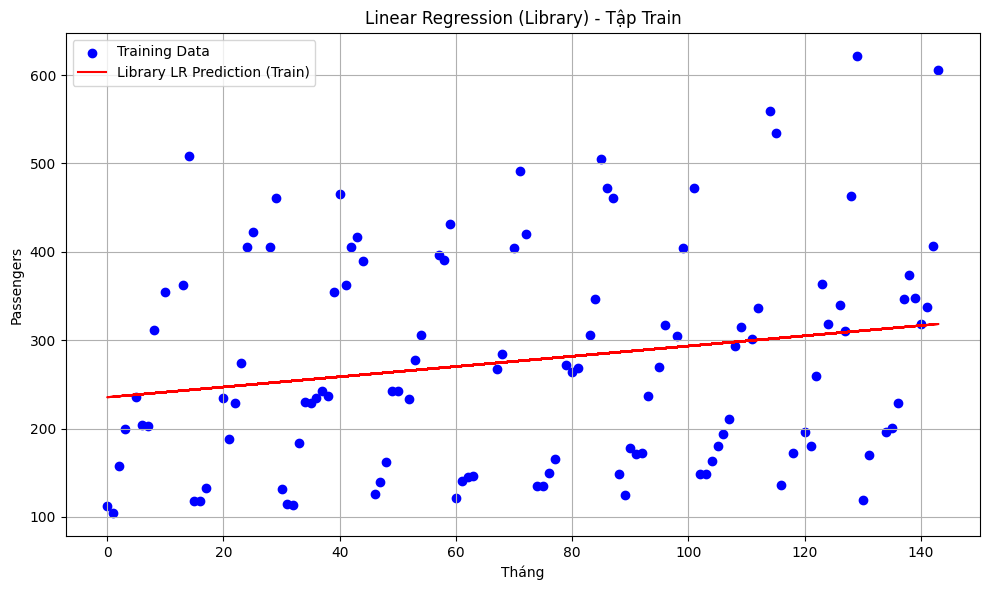

In [ ]:
import matplotlib.pyplot as plt
# Visualize the training result using the library model
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 1], y_train, color='blue', label='Training Data')
plt.plot(X_train[:, 1], model2.predict(X_train[:, 1].reshape(-1, 1)), color='red', label='Library LR Prediction (Train)')
plt.xlabel('Tháng')
plt.ylabel('Passengers')
plt.title('Linear Regression (Library) - Tập Train')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#So sánh kết quả trên LR và LR gọi từ thư viện

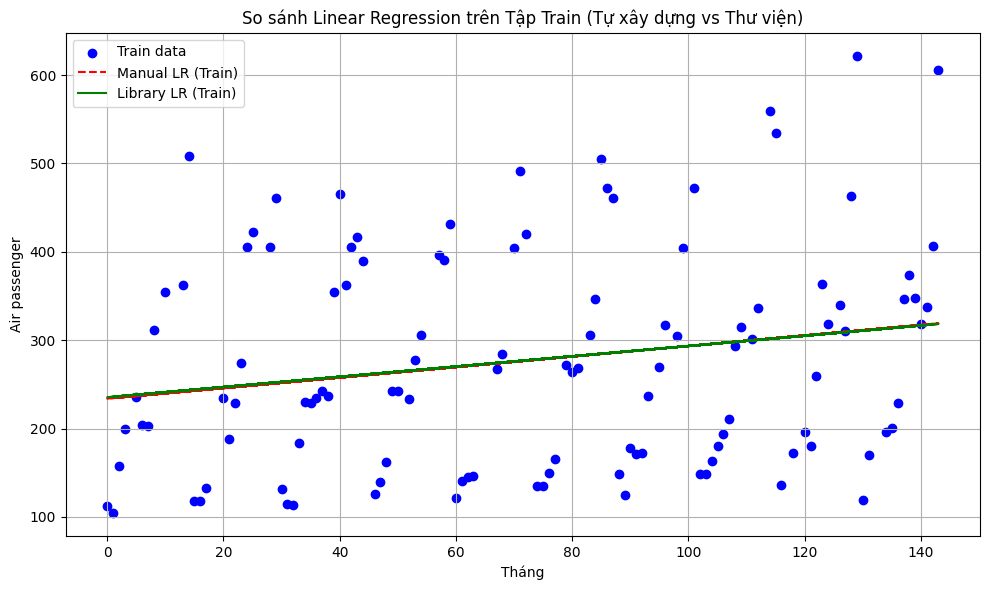

In [ ]:
# Dự đoán trên tập train bằng mô hình tự xây dựng
y_train_pred_manual = predict(X_train, theta)
# Dự đoán trên tập train bằng mô hình từ thư viện
y_train_pred_lib = model2.predict(X_train[:, 1].reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 1], y_train, color='blue', label='Train data')
plt.plot(X_train[:, 1], y_train_pred_manual, color='red', linestyle='--', label='Manual LR (Train)')
plt.plot(X_train[:, 1], y_train_pred_lib, color='green', linestyle='-', label='Library LR (Train)')
plt.xlabel('Tháng')
plt.ylabel('Air passenger')
plt.title('So sánh Linear Regression trên Tập Train (Tự xây dựng vs Thư viện)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


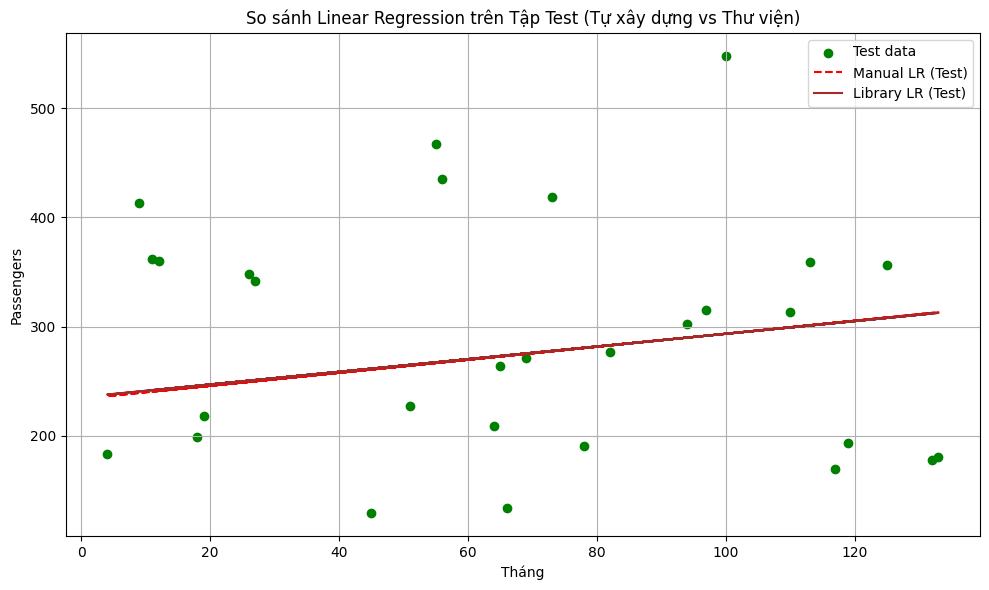

In [ ]:
# So sánh trực quan kết quả trên tập test
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 1], y_test, color='green', label='Test data')
plt.plot(X_test[:, 1], y_test_pred, color='red', linestyle='--', label='Manual LR (Test)')
plt.plot(X_test[:, 1], y_pred_lib, color='brown', linestyle='-', label='Library LR (Test)')
plt.xlabel('Tháng')
plt.ylabel('Passengers')
plt.title('So sánh Linear Regression trên Tập Test (Tự xây dựng vs Thư viện)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Linear Regression:
- MSE (Manual) : 12368.7163 | MSE (Library) : 12311.8350
- RMSE (Manual): 111.2147  | RMSE (Library): 110.9587
- R2 (Manual)  : -0.1135   | R2 (Library)  : -0.1084

Đánh giá:
- Kết quả MSE, RMSE và R² giữa tính thủ công và thư viện có sự chênh lệch không qua cao
-Manual có độ chính xác thấp hơn cho chưa tối ưu tự động được như thư viện mà cần phải có số epoch phù hợp để tối ưu

- Tổng thể: Kết quả tốt, quy trình đúng. có thể tối ưu chạy thủ công bằng cách thêm